# My Segmentation Workflow

This notebook segments a 3D nuclei image and measure their properties

In [1]:
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari
viewer = napari.Viewer()

C:\Miniconda\envs\i2k-env\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


## 1. Open the image and add it to napari

In [2]:
image0_n = imread("data/nuclei3d.tif")
viewer.add_image(image0_n, name="nuclei3d")

<Image layer 'nuclei3d' at 0x1d3c0cf44c0>

## 2. Apply voronoi otsu labeling from 'nsbatwm'

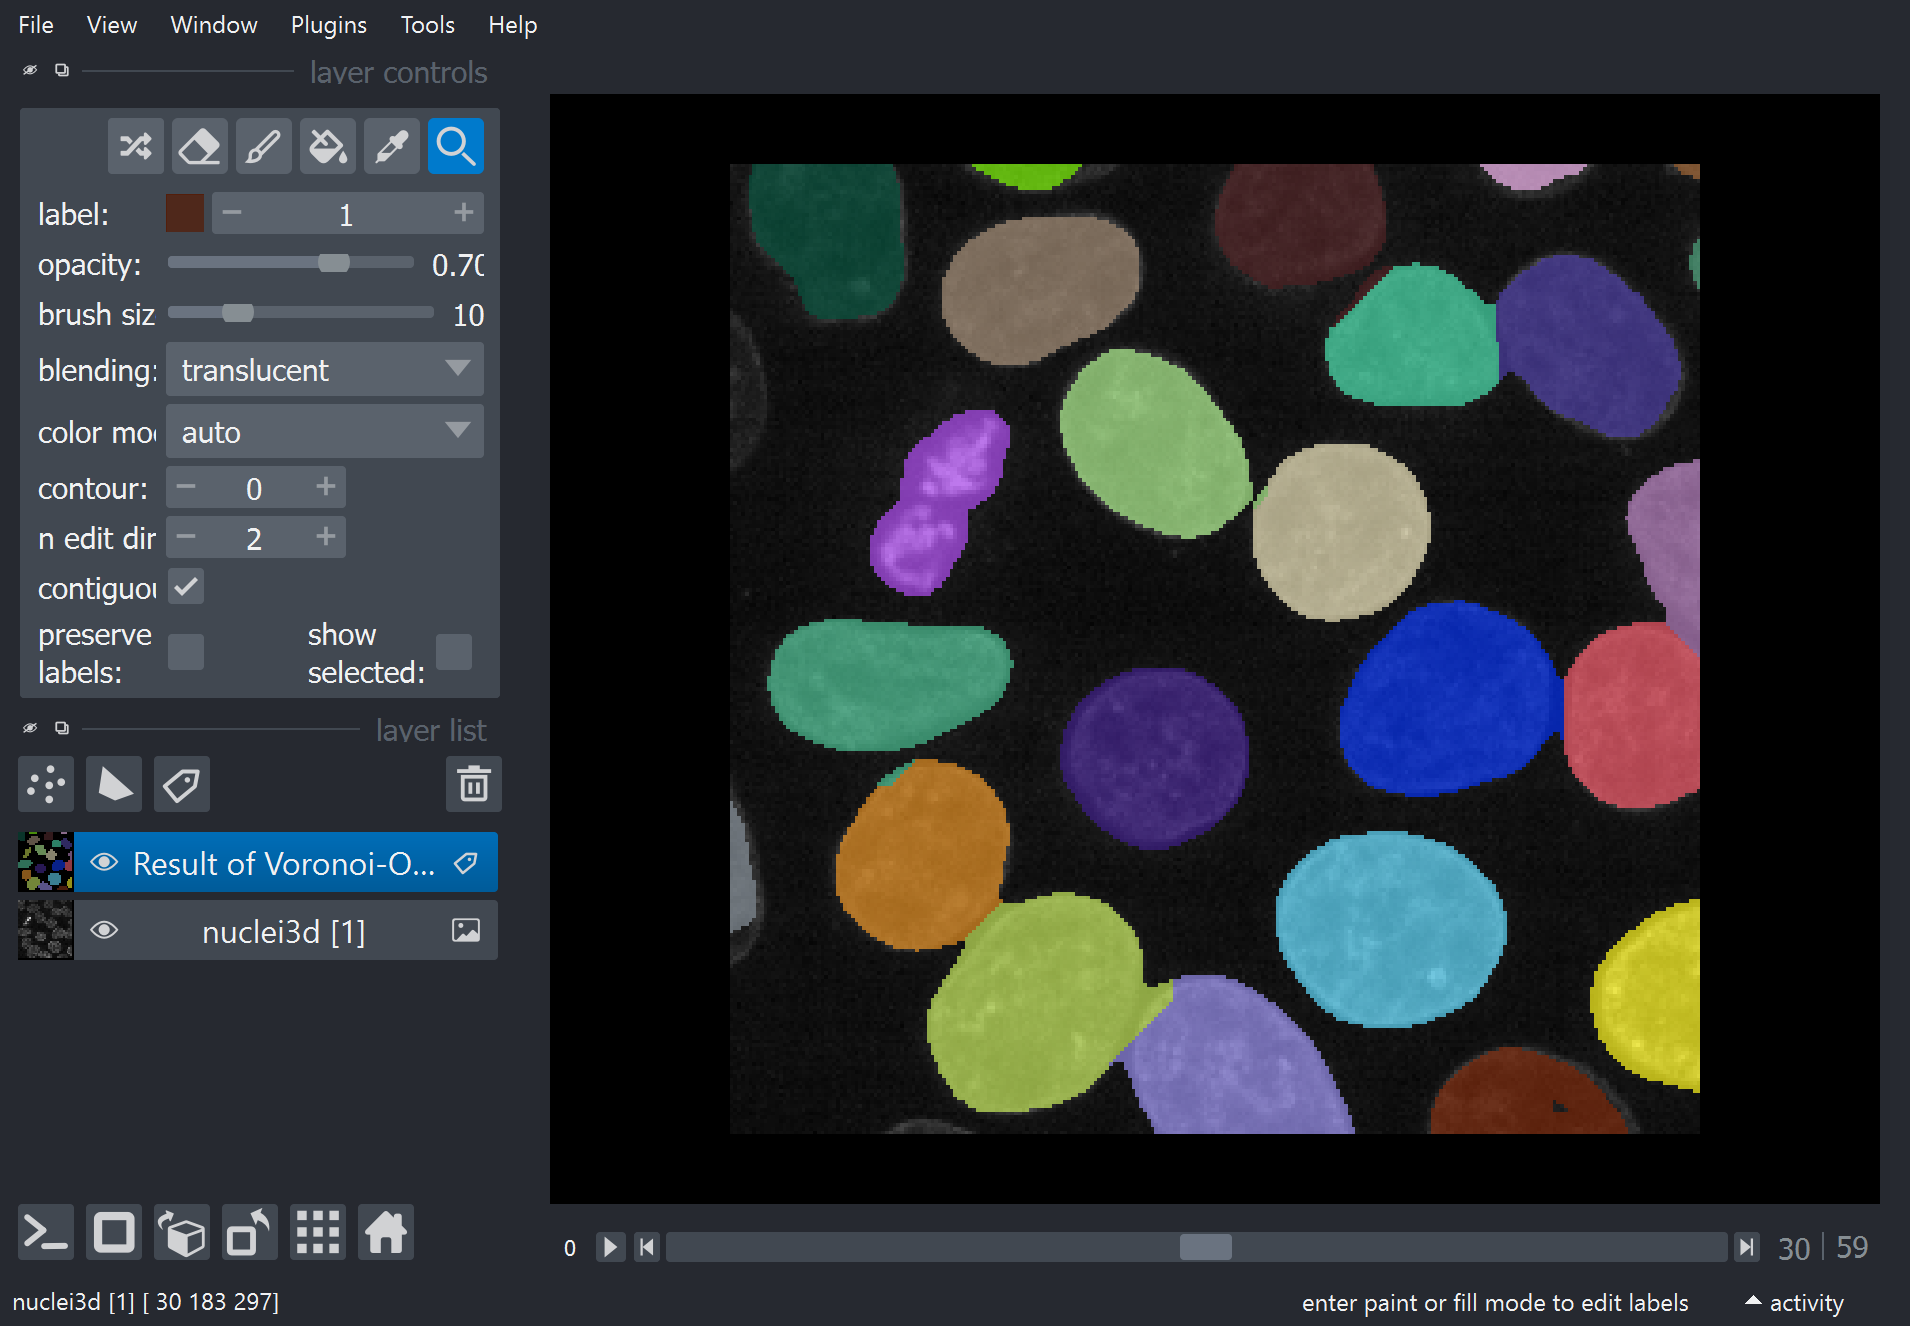

In [4]:
image1_V = nsbatwm.voronoi_otsu_labeling(image0_n, 9.0, 3.0)
viewer.add_labels(image1_V, name='Result of Voronoi-Otsu-labeling (nsbatwm)')
napari.utils.nbscreenshot(viewer)

## 3. Apply remove labels on edges from 'nsbatwm'

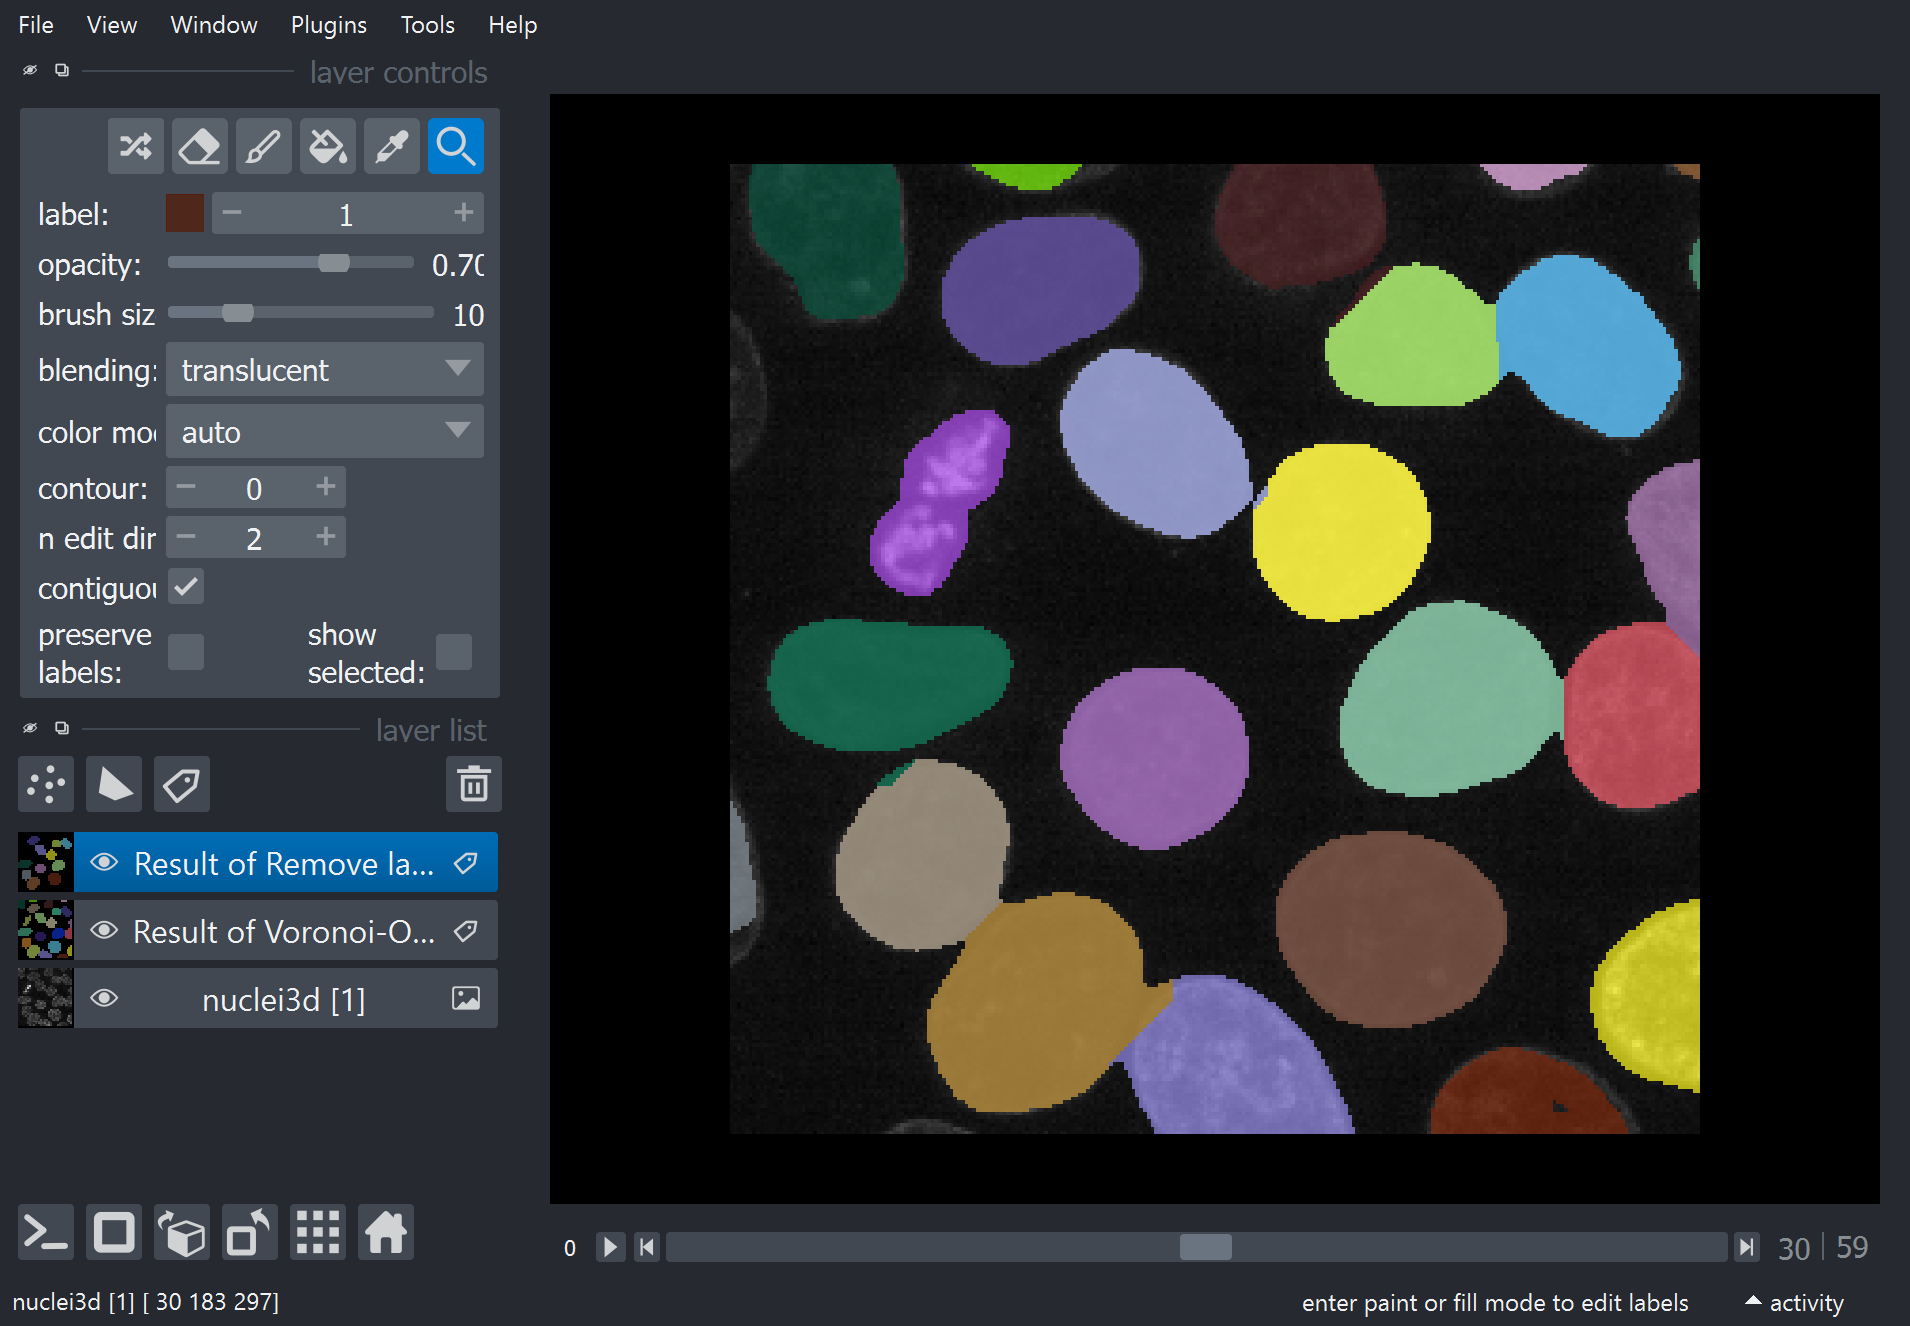

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [5]:
image2_R = nsbatwm.remove_labels_on_edges(image1_V)
viewer.add_labels(
    image2_R, name='Result of Remove labeled objects at the image border (scikit-image, nsbatwm)')
napari.utils.nbscreenshot(viewer)

## 4. Measure properties from 'scikit-image'

In [6]:
from napari_skimage_regionprops._regionprops import regionprops_table

In [7]:
df = regionprops_table(image0_n, image2_R, shape = True)
df

,label,area,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,min_intensity,solidity,extent,feret_diameter_max,local_centroid-0,local_centroid-1,local_centroid-2,standard_deviation_intensity,minor_axis_length,intermediate_axis_length,major_axis_length
0,1,54018,95160,56545,46.900769,55624.0,14464.512237,2656.0,0.955310,0.567654,62.713635,13.364397,25.457755,29.293958,4805.435420,31.327969,52.933836,62.953106
1,2,33789,71400,37316,40.110577,27219.0,11941.699014,3841.0,0.905483,0.473235,57.323643,12.970641,24.381988,25.413922,2634.150462,27.770888,40.471195,58.424627
2,3,37770,84150,40336,41.627736,34332.0,12231.912126,4410.0,0.936384,0.448841,60.942596,14.037225,25.143685,24.855361,2812.426772,30.788439,40.258475,59.120315
3,4,62690,138355,70018,49.287094,46093.0,13604.486840,3177.0,0.895341,0.453110,69.555733,17.141298,29.485404,30.823369,4320.199048,33.433710,53.831092,67.988548
4,5,35227,67840,37057,40.671702,34617.0,12520.697703,5216.0,0.950617,0.519266,56.621551,14.429500,18.455418,25.085531,2672.433396,31.836384,37.536132,57.477872
5,6,50281,96720,53668,45.793281,32910.0,13568.257433,2845.0,0.936890,0.519861,63.039670,14.202084,26.887970,29.218631,3758.117584,30.653051,50.748681,62.747225
6,7,47652,91035,49683,44.980834,47610.0,15270.557668,3367.0,0.959121,0.523447,55.263008,16.303828,24.445417,24.678712,5085.798832,33.553811,50.917972,53.555392
7,8,39960,74307,42190,42.417228,42394.0,12881.410035,3746.0,0.947144,0.537769,53.600373,14.970821,25.792593,23.624575,3322.773305,31.962681,45.374937,53.145880
8,9,41456,78336,43518,42.940087,39406.0,13613.137712,3746.0,0.952617,0.529208,50.813384,15.346850,23.811318,23.456532,3504.742536,33.757661,47.638142,49.489597
9,10,37480,77175,39760,41.520922,36134.0,13623.915715,2656.0,0.942656,0.485649,52.411831,17.442716,22.771798,24.673986,3463.962853,31.691874,45.865526,49.960174


## 5. Plot data

<AxesSubplot:xlabel='area', ylabel='mean_intensity'>

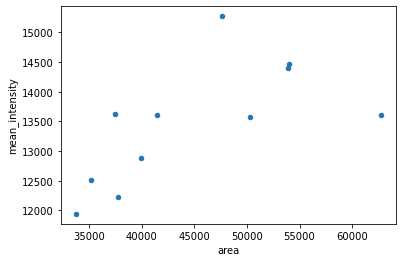

In [8]:
df.plot.scatter('area', 'mean_intensity')

## 6. Save table to disk

In [9]:
df.to_excel('df.xlsx')